# Divide and Conquer

Mit einfachen Sortieralgorithmen, wie beispielweise *Selection Sort*, *Insertion Sort* oder *Bubble Sort*, ist es möglich, Arrays bzw. Listen zu sortieren. Im worst case beträgt die Zeitkomplexität dieser Verfahren $\mathcal{O}(n^2)$. 

Es gibt jedoch Algorithmen, die dies wesentlich schneller können und in einer besseren Komplexitätsklasse liegen. Eines dieser Verfahren ist **Merge Sort**. Es arbeitet nach dem Muster "*Divide and Conquer*" (*Teile und Herrsche*). Ein Teile-und-Herrsche-Algorithmus läuft im Wesentlichen in drei Schritten ab:

1. Teilen - Das Problem wird in $a$ gleichartige Subprobleme der Größe $\frac{n}{b}$ geteilt, welche sich einfacher lösen lassen.

2. Die Subprobleme werden *rekursiv* gelöst (d.h. solange geteilt, bis sie so klein sind, dass es sich um triviale Probleme handelt, die sich sehr einfach lösen lassen).

3. Die Ergebnisse der Subprobleme werden zusammengeführt (to merge), um dadurch das Ergebnis für das ursprüngliche große Problem zu gewinnen.

Warum *müssen* die Subprobleme *rekursiv* gelöst werden? Dies ist notwendig, um eine bessere Zeitkomplexität zu erzielen, wie folgendes Beispiel illustriert:

Wir nehmen an, $a$ sei $3$ (Anzahl der Teilprobleme) und $b$ sei $2$ (Größe dieser Teilprobleme). Ein Verfahren $B$ verwendet zur Bearbeitung der Teilprobleme ein Verfahren $A$. Dann ergibt sich ein Aufwand von $T_B(n)=3\cdot T_A\left(\frac{n}{2}\right)+n$. Wenn $A$ mit quadratischem Aufwand arbeitet, d.h. $T_A\in\mathcal{O}(n^2)$, also $T_A(n)\leq c\cdot n^2$, gilt $T_B(n)\leq 3\cdot c\cdot \frac{n^2}{4}+n\leq \frac{3}{4}\cdot c\cdot n^2+n$. Am Faktor $\frac{3}{4}$ erkennt man, dass tatsächlich eine Effizienzverbesserung von 25% gegenüber dem quadratischen Zeitaufwand eintritt.

Verwendet ein Verfahren $C$ *rekursive* Teilproblemlösungen, ergibt sich der Aufwand wie folgt: 
$$
\begin{eqnarray}
T_C(n) &=& a\cdot T_C\left(\frac{n}{b}\right)+f(n)\\
       &=& 3\cdot T_C\left(\frac{n}{2}\right)+f(n) 
\end{eqnarray}
$$
Nach der Mastermethode, Fall 1, ergibt sich $f(n)=\mathcal{O}(n)=\mathcal{O}(n^{\log_23-\varepsilon})$, wenn $\varepsilon>0: T_C(n)=\mathcal{\Theta}(n^{\log_23})=\mathcal{\Theta}(n^{1.59}).$

Wir erkennen, dass sich gegenüber dem quadratischen Aufwand eine Verbesserung der Aufwandsordnung ergibt, wenn man die Teilprobleme *rekursiv* löst.

## Mergesort

Bei Mergesort findet das Teilen (Divide) durch das Zerlegen der Liste in zwei (ungefähr) gleich große Teillisten statt. Die Teillisten werden rekursiv solange geteilt, bis ein Elementarfall erreicht ist. Der Elementarfall tritt ein, wenn die Liste entweder leer ist oder nur genau ein Element enthält. Für diese beiden Fälle ist die Sortierung sehr einfach: Die Liste muss lediglich, so wie sie ist, zurückgegeben werden. Leere und einelementige Listen sind sortierte Listen. Der dritte Schritt ist das "Mergen" der *sortierten* Teillisten. Dies findet statt, indem die jeweils ersten Elemente beider Teillisten miteinander verglichen werden und das kleinere Element in die Gesamtliste verschoben wird. Dieser Vorgang wird solange wiederholt, bis wenigstens eine der beiden Teillisten leer ist. Die andere wird in der aktuellen Gesamtliste einfach angefügt.

Das folgende rekursive Programm setzt diese Beschreibung um.

In [36]:
import math

def mergesort(lst):
    if len(lst) < 2:
        return lst   
    return merge(mergesort(lst[0:math.floor(len(lst)/2)]), mergesort(lst[math.floor(len(lst)/2):len(lst)]))
       

def merge(a, b):    
    if not a:       
        return b    
    if not b:
        return a    
    if a[0] < b[0]:    
        return [a[0]] + merge(a[1:], b)  
    return [b[0]] + merge(a, b[1:])  
                                     

print(mergesort([5, 1, 8, 2, 7, 3, 4]))

[1, 2, 3, 4, 5, 7, 8]



![Merge Sort](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Merge_sort_algorithm_diagram.svg/300px-Merge_sort_algorithm_diagram.svg.png)

In der Abbildung sind der rekursive Ab- und Aufstieg sehr gut sichtbar.

### Komplexitätsbetrachtung
Die folgende Rekurrenzgleichung ergibt sich unmittelbar aus der rekursiven Natur des Verfahrens.
\begin{eqnarray}
T(0) &=& 0  \\
T(n) &=& 2 \cdot T \left(\frac{n}{2} \right) + n
\end{eqnarray}

Man kann sie mit der Meistermethode rezeptartig lösen. Es greift Fall 2 für $a=2, b=2$ und $f(n)=n$.


$$
\Theta \left(n^{\log_{b}a} \right) = \Theta \left(n^{\log_{2}2} \right) = \Theta(n) \\
f(n) \in \Theta(n) \\
n \in \Theta(n)
$$

Damit ergibt sich:

$$
\begin{align}
T(n) & \in \Theta \left(n^{\log_{b}a}\log_{2}n \right) \\ 
 & \in \Theta \left(n^{\log_{2}2}\log_{2}n \right) \\
 & \in \Theta \left(n\log n \right)
\end{align}
$$
<div style="text-align: right; font-size: 24px;">&#9633;</div>

Der Zeitaufwand für Mergesort liegt in $\mathcal{O}(n\log{n})$ (all cases) und ist damit eines der besten Sortierverfahren überhaupt.

Zu beachten ist allerdings, dass Mergesort *kein in-place-Verfahren* ist und deshalb das Ergebnis, also die sortierte Gesamtliste in ein separates Feld (um)speichert. 

Mergesort in nichtrekursiver Implementierung eignet sich als *externes Sortierverfahren*. D.h., es brauchen nicht alle Daten gleichzeitig im Hauptspeicher vorzuliegen, sondern zum Teil in einer externen Datei. Dann werden drei Dateien verwendet und mit Mergesort verarbeitet.

## Quicksort

Die Idee hinter *Quicksort* (1960 von C. Antony R. Hoare entwickelt) besteht darin, die Gesamtliste der zu sortierenden Elemente so in genau zwei Teillisten $L$ (linke Teilliste) und $R$ (rechte Teilliste) zu zerlegen, dass alle Elemente von $L$/$R$ kleiner/größer als ein Vergleichselement sind. 

Dieses Vergleichselement wird Pivotelement genannt. Es wird der zu sortierenden Gesamtliste an beliebiger Stelle entnommen: Eine Möglichkeit ist es, immer das erste oder letzte Element der Liste zu nehmen. Eine weitere gängige Methode ist es, das Pivotlement (pseudo)-zufällig auszuwählen, welche Auswirkungen dies auf die average- und worst-case Zeitklomplexität hat, wird im Kapital der randomisierten Algorithmen betrachtet. Die beiden Teillisten rechts und links neben dem Pivotelement müssen solange in einem rekursiven Prozess in Teillisten zerlegt werden, bis die Basisfälle erreicht sind. 

Die Basisfälle sind die gleichen wie bei Mergesort: Ist die Liste leer oder enthält sie nur ein Element, so ist praktisch nichts zu tun und die Liste kann unverändert zurückgegeben werden. 

Das Zusammenführen, also der dritte Schritt eines Divide-and-Conquer-Algorithmus, ist bei Quicksort trivial, da die Teilarrays in ihrer vorhandenen Reihenfolge lediglich verbunden werden müssen, natürlich mit dem Pivotelement dazwischen.

<img src="https://antjanusblog-antjanus.netdna-ssl.com/wp-content/uploads/2014/02/color-quicksort.jpg" alt="Drawing" style="width: 400px;"/>

In der Abbildung ist dargestellt, dass das jeweils erste Element der zu sortierenden Teilliste als Pivot verwendet wird.

Das folgende Programm setzt das beschriebene Verfahren adäquat um. Die Implementierung von Quicksort wird im Allgemeinen als in-place-Verfahren vorgenommen.

In [37]:
def quicksort(lst):
    if len(lst) < 2:
        return lst
    wall = 0
    pivot = lst[0]
    for i in range(1, len(lst)):
        if lst[i] < pivot:
            lst[wall+1], lst[i] = lst[i], lst[wall+1]
            wall += 1
    lst[0], lst[wall] = lst[wall], lst[0]
    return quicksort(lst[:wall]) + [lst[wall]] + quicksort(lst[wall+1:])

print(quicksort([5, 1, 8, 2, 7, 3, 4]))     

[1, 2, 3, 4, 5, 7, 8]


### Komplexitätsbetrachtung

#### Best-case

Der best-case tritt ein, wenn das Pivotelement die Listen immer in zwei gleich große Teillisten teilt.

$$
\begin{align}
T(0) & = 0 \\
T(n) & = 2 \cdot T \left(\frac{n}{2} \right) + n
\end{align}$$

Dies kann äquivalent zu Mergesort mit der Meistermethode gelöst werden und man erhält eine Zeitkomplexität von $\mathcal{O}(n\log{n})$ im **best-case** (s. CW-Buch). Dies gilt übrigens auch für den __average-case__.

#### Worst-case

Der worst-case liegt vor, wenn das Pivotelement die Liste immer in eine leere Teilliste und eine Teilliste der Größe $n-1$ teilt. Dies ist beispielsweise der Fall, wenn man immer das erste Element als Pivot wählt und eine bereits sortierte Liste sortiert. (Das ist kein Schreibfehler: Schlechte Effizienz der Quicksort-Sortierung, wenn die zu sortierende Liste bereits sortiert ist.)

$$
\begin{align}
T(0) & = 0 \\
T(n) & = T(0) + T(n-1) + n
\end{align}$$

Dies kann mit Hilfe der Iterationsmethode gelöst werden.

$$
\begin{align}
T(n) & = T(0) + T(n-1) + n \\
 & = T(0) + (T(0) + T(n-2) + n-1) + n \\
 & = 2T(0)+ T(n-2) + 2n-1 \\
 & = 2T(0)+ (T(0) + T(n-3) + n-2) + 2n-1 \\
 & = 3T(0)+ T(n-3) + 3n-3 \\
 & = 3T(0)+ (T(0) + T(n-4) + n-3) + 3n-3 \\
 & = 4T(0)+ T(n-4) + 4n-6\\
 & \vdots \\
T(n) & = iT(0) + T(n-i) + in - \sum_{k=0}^{i-1}k
\end{align}
$$
für $i=1,2,3,\ldots,n$. Wenn $i=n$ gilt:

$$
\begin{align}
T(n) & = nT(0)+T(n-n)+n^2-\sum_{k=0}^{n-1}k \\
     & = n^2 + \frac{n-1}{2}n \\
     & = \frac{n^2+n}{2}  
\end{align}
$$

Ergebnis: Quicksort im worst case liegt in $\mathcal{O}(n^2)$

<!--  div style="text-align: right; font-size: 24px;">&#9633;</div  -->

Der Zeitaufwand beträgt also $\mathcal{O}(n^2)$ im __worst-case__.

## Konvexe Hülle

Auch im Bereich der geometrischen Algorithmen spielen Teile-und-Herrsche-Verfahren eine große Rolle. 

Die konvexe Hülle einer Menge an Punkten $P$ im $n$-dimensionalen euklidischen Raum ist das konvexe $n$-Polytop, das alle Punkte $P$ enthält und ein minimales Volumen bzw. minimalen Flächeninhalt besitzt. Äquivalent handelt es sich dabei um ein beliebiges $n$-Polytop mit minimaler Außenfläche bzw. minimalem Umfang. In der Ebene, also im 2-dimensionalen euklidischen Raum, handelt es sich dabei um das Polygon, das alle Punkte enthält mit minimalen Umfang. 

Eine Menge $M$ heißt **konvex**, wenn für alle Punkte $p,q\in M$ gilt, dass sämtliche Punkte, die auf der Strecke <tt>pq</tt> liegen, ebenfalls in $M$ ist. 

<img src="img/ConvexHull.png" alt="Drawing" style="width: 350px;"/>

<center>Konvexe Hülle (Convex hull)</center>

Man kann es sich so vorstellen, als würde man ein Gummiband um die Punkte spannen.

Ziel ist es nun einen Algorithmus zu entwickeln, der das Problem, die konvexe Hülle einer beliebigen Menge gegebener Punkte $P$ zu finden, möglichst effizient löst. Zur Vereinfachung nehmen wir an, dass keine 3 Punkte auf einer Linie liegen und dass keine 2 Punkte dieselbe x-Koordinate haben.

### Brute-Force - Ansatz

Man kann sich jede Verbindung zwischen zwei Punkten als ein Segment vorstellen. Die konvexe Hülle besteht dabei aus einer Menge $S$ solcher Segmente. Diese Menge $S$ ist gleichzeitig eine Teilmenge aller möglichen Segmente der $n$-Punkte. Anhand dieser Tatsache kann man die konvexe Hülle finden, indem man alle möglichen Segmente bildet und bei jedem einzelnen Segment prüft, ob es zur konvexe Hülle gehört oder nicht. Alle Segmente, bei denen dieser Test positiv ausfällt, bilden zusammen die konvexe Hülle. Ein Segment gehört genau dann zur konvexe Hülle, wenn alle Punkte $P$ auf genau einer Seite der Geraden liegen, welche durch das Segment geht.

<img src="img/Segment1.png" alt="Drawing" style="width: 350px;"/>

<center>Segment <tt>AB</tt> gehört zur konvexen Hülle, da alle Punkte auf einer Seite liegen.</center>

<img src="img/Segment2.png" alt="Drawing" style="width: 350px;"/>

<center>Segment <tt>AI</tt> gehört <i>nicht</i> zur konvexen Hülle, da die Punkte auf verschiedenen Seiten liegen.</center>

Für $n$ Punkte gibt es $\binom{n}{2}$ Punktepaare. Folglich beträgt die Anzahl der zu prüfenden Segmente ebenso $\binom{n}{2}$:
$$\sum_{i=0}^{n-1}i =\frac{n (n-1)}{2} = \binom{n}{2} \in \mathcal{O}(n^2)$$
<div style="text-align: right; font-size: 24px;">&#9633;</div>

Für jedes der $\binom{n}{2}$ Segmente muss nun für jeden der $n-2$ Punkte geprüft werden, ob sie alle auf ein und derselben Seite liegen. Dies ergibt einen Aufwand von $\mathcal{O}(n^2)\cdot\mathcal{O}(n)=\mathcal{O}(n^3)$. Das ist ein beachtlicher Aufwand. Mit einem Teile-und-herrsche-Verfahren sollte das besser möglich sein.


### Divide and Conquer - Ansatz

Der erste Schritt ist das Teilen. Das Teilen findet statt, indem zunächst alle Punkte in $P$ entlang einer beispielsweise zur y-Achse parallelen Geraden eingeordnet werden, was dazu führt, dass die Punkte nach ihren x-Koordinaten sortiert werden. Wenn wir dafür Merge-Sort verwenden, kostet dies $\mathcal{O}(n \log n) $. Nach dem Sortieren können die Punkte aus $P$ in zwei gleich große Mengen geteilt werden, wodurch nun zwei Teilprobleme entstehen, welche rekursiv gelöst werden.

<img src="img/ConvexHullDivide.png" alt="Drawing" style="width: 350px;"/>

Die Basisfälle bilden Mengen, die aus genau zwei Punkten bestehen. ($|P|=0, |P|=1$ sind nicht erlaubt.) In diesem Fall ist die konvexe Hülle die Strecke zwischen den zwei Punkten.

Hat man die Teilprobleme gelöst, so ist es notwendig, die beiden konvexen Hüllen der Teilprobleme zur konvexen Hülle des Gesamtproblems zusammenzuführen (Merge). Der naive Ansatz wäre es, alle Segmente zwischen einem Punkt aus der linken Hälfte und einem Punkt aus der rechten Hälfte durchzugehen, und das höchste und tiefste Segment, als das Segment, welche die beiden Teil-konvexen Hüllen verbindet, zu wählen. 

<img src="img/ConvexHullMerge1.png" alt="Drawing" style="width: 350px;"/>

Da es aber auf beiden Seiten jeweils $\frac{n}{2}$ Punkte gibt, müssten $\frac{n^2}{4}$, also $\mathcal{O}(n^2)$ Segmente überprüft werden. Damit ist die Merge-Operation so aufwendig, das kein Gewinn in der Komplexitätsklasse gegenüber dem ursprünglichen Brute-Froce-Ansatz entsteht. 

Wir brauchen also ein anderes Verfahren für die Merge-Operation. Hierfür wird zunächst jeweils ein Punkt aus beiden Mengen genommen, beispielsweise $a_1$ und $b_1$. Der Schnittpunkt mit der Geraden in der Mitte wird ermittelt. Nun besteht das Ziel darin, ein Segment zu finden, welches einen höher liegenden Schnittpunkt hat (größerer y-Wert), da das höchste und tiefste Segment gesucht wird. Dieser Vorgang geschieht, indem zunächst auf der rechten Seite der im Uhrzeigersinn nächste Punkt gewählt wird. Der Schnittpunkt mit der Geraden des neuen Segments wird verglichen, ist er nicht höher als der bisherige Wert, so braucht man nicht weiter im Uhrzeigersinn zu gehen und hat den Punkt der rechten Hälfte, welcher zum oberen Segment gehört, bereits gefunden. Ist er hingegen höher, so muss auf der linken Seite gegen den Uhrzeigersinn gegangen werden, und das daraus entstandene Segment verglichen werden. Dieser Vorgang des abwechselnd auf der linken Seite gegen den Uhrzeigersinn und auf der rechten Seite im Uhrzeigersinn zu gehen, wird solange weitergeführt, bis auf der jeweiligen Seite kein höher liegender Schnittpunkt mit der Geraden erreicht wird. Um das untere Segment zu finden, muss entsprechend das Segment mit dem niedrigsten Schnittpunkt gefunden werden und entsprechend auf der linken Seite im Uhrzeigersinn und auf der rechten Seite entgegen des Uhrzeigersinns gegangen werden.

<img src="img/ConvexHullMerge2.png" alt="Drawing" style="width: 450px;"/>

Hieraus ergibt sich, dass das Segment $(a_3, b_2)$ das gesuchte ist.

<img src="img/ConvexHullMerge3.png" alt="Drawing" style="width: 450px;"/>

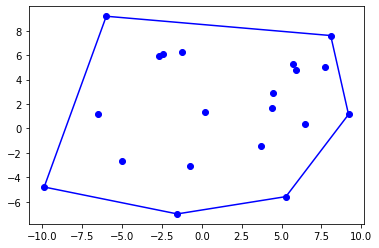

In [38]:
import math
import random
from sympy import Symbol, nsolve
import matplotlib.pyplot as plt


def x_value(point):
    return point[0]


def vector(a, b):
    return (b[0] - a[0], b[1] - a[1])


def clockwise(u, v):
    return u[0] * v[1] - u[1] * v[0] > 0


def index_of_most_left_point(points):
    x = None
    index = 0
    for i in range(0, len(points)):
        if x is None or points[i][0] < x:
            x = points[i][0]
            index = i
    return index


def index_of_most_right_point(points):
    x = None
    index = 0
    for i in range(0, len(points)):
        if x is None or points[i][0] > x:
            x = points[i][0]
            index = i
    return index


def segments_to_points(segments):
    points = []
    for segment in segments:
        points.append(segment[0])
    return points


def mid_x(a, b):
    return (segments_to_points(a)[index_of_most_right_point(segments_to_points(a))][0] +
            segments_to_points(b)[index_of_most_left_point(segments_to_points(b))][0]) / 2


def intercept(line1, line2):
    x = Symbol('x')
    y = Symbol('y')
    a, b = nsolve([line1[0][0] + x * line1[1][0] - (line2[0][0] + y * line2[1][0]),
                   line1[0][1] + x * line1[1][1] - (line2[0][1] + y * line2[1][1])], [x, y], [line1[0][0], line1[1][0]])
    return (line1[0][0] + a * line1[1][0], line1[0][1] + a * line1[1][1])


def convex_hull(points):
    if len(points) == 2:
        return [(points[0], points[1]), (points[1], points[0])]
    if len(points) == 3:
        if clockwise(vector(points[0], points[2]), vector(points[0], points[1])):
            return [(points[0], points[1]), (points[1], points[2]), (points[2], points[0])]
        return [(points[0], points[2]), (points[2], points[1]), (points[1], points[0])]
    sorted_points = sorted(points, key=x_value)
    mid = int(math.floor(len(sorted_points) / 2))
    return merge(convex_hull(sorted_points[:mid]), convex_hull(sorted_points[mid:]))


def merge(a, b):
    index_a_top = index_of_most_right_point(segments_to_points(a))
    index_b_top = index_of_most_left_point(segments_to_points(b))
    mid_line = ((mid_x(a, b), 0), (0, 1))
    temp_intercept = intercept(mid_line, (a[index_a_top][0], vector(a[index_a_top][0], b[index_b_top][0])))[1]

    while True:
        improvement = False
        if intercept(mid_line, (a[index_a_top][0],
                                vector(a[index_a_top][0], b[(index_b_top + 1) % len(b)][0])))[1] > temp_intercept:
            temp_intercept = intercept(mid_line, (a[index_a_top][0],
                                                  vector(a[index_a_top][0], b[(index_b_top + 1) % len(b)][0])))[1]
            index_b_top += 1
            improvement = True
        if intercept(mid_line, (a[(index_a_top - 1) % len(a)][0],
                                vector(a[(index_a_top - 1) % len(a)][0], b[index_b_top][0])))[1] > temp_intercept:
            temp_intercept = intercept(mid_line, (a[(index_a_top - 1) % len(a)][0],
                                                  vector(a[(index_a_top - 1) % len(a)][0], b[index_b_top][0])))[1]
            index_a_top -= 1
            improvement = True
        if not improvement:
            break
        index_a_top %= len(a)
        index_b_top %= len(b)

    index_a_bottom = index_of_most_right_point(segments_to_points(a))
    index_b_bottom = index_of_most_left_point(segments_to_points(b))
    temp_intercept = intercept(mid_line, (a[index_a_bottom][0], vector(a[index_a_bottom][0], b[index_b_bottom][0])))[1]

    while True:
        improvement = False
        if intercept(mid_line, (a[index_a_bottom][0],
                                vector(a[index_a_bottom][0], b[(index_b_bottom - 1) % len(b)][0])))[1] < temp_intercept:
            temp_intercept = intercept(mid_line, (a[index_a_bottom][0],
                                                  vector(a[index_a_bottom][0], b[(index_b_bottom - 1) % len(b)][0])))[1]
            index_b_bottom -= 1
            improvement = True
        if intercept(mid_line, (a[(index_a_bottom + 1) % len(a)][0],
                                vector(a[(index_a_bottom + 1) % len(a)][0], b[index_b_bottom][0])))[1] < temp_intercept:
            temp_intercept = intercept(mid_line, (a[(index_a_bottom + 1) % len(a)][0],
                                                  vector(a[(index_a_bottom + 1) % len(a)][0], b[index_b_bottom][0])))[1]
            index_a_bottom += 1
            improvement = True
        if not improvement:
            break
        index_a_bottom %= len(a)
        index_b_bottom %= len(b)

    merged = []

    i = index_a_bottom
    while i != index_a_top:
        merged.append(a[i])
        i += 1
        i = i % len(a)
    merged.append((a[index_a_top][0], b[index_b_top][0]))
    i = index_b_top
    while i != index_b_bottom:
        merged.append(b[i])
        i += 1
        i = i % len(b)
    merged.append((b[index_b_bottom][0], a[index_a_bottom][0]))
    return merged


points = []

for i in range(0, 20):
    points.append((random.uniform(-10, 10), random.uniform(-10, 10)))

convex_hull = convex_hull(points)

fig = plt.subplot()

x_list = []
y_list = []

for point in points:
    x_list.append(point[0])
    y_list.append(point[1])

fig.plot(x_list, y_list, 'ro', color='blue')

x_list_segments = []
y_list_segments = []

for segment in convex_hull:
    x_list_segments.append(segment[0][0])
    y_list_segments.append(segment[0][1])
x_list_segments.append(convex_hull[0][0][0])
y_list_segments.append(convex_hull[0][0][1])

fig.plot(x_list_segments, y_list_segments, 'r', color='blue')
plt.show()